## logistic regression

### regression 和 classification
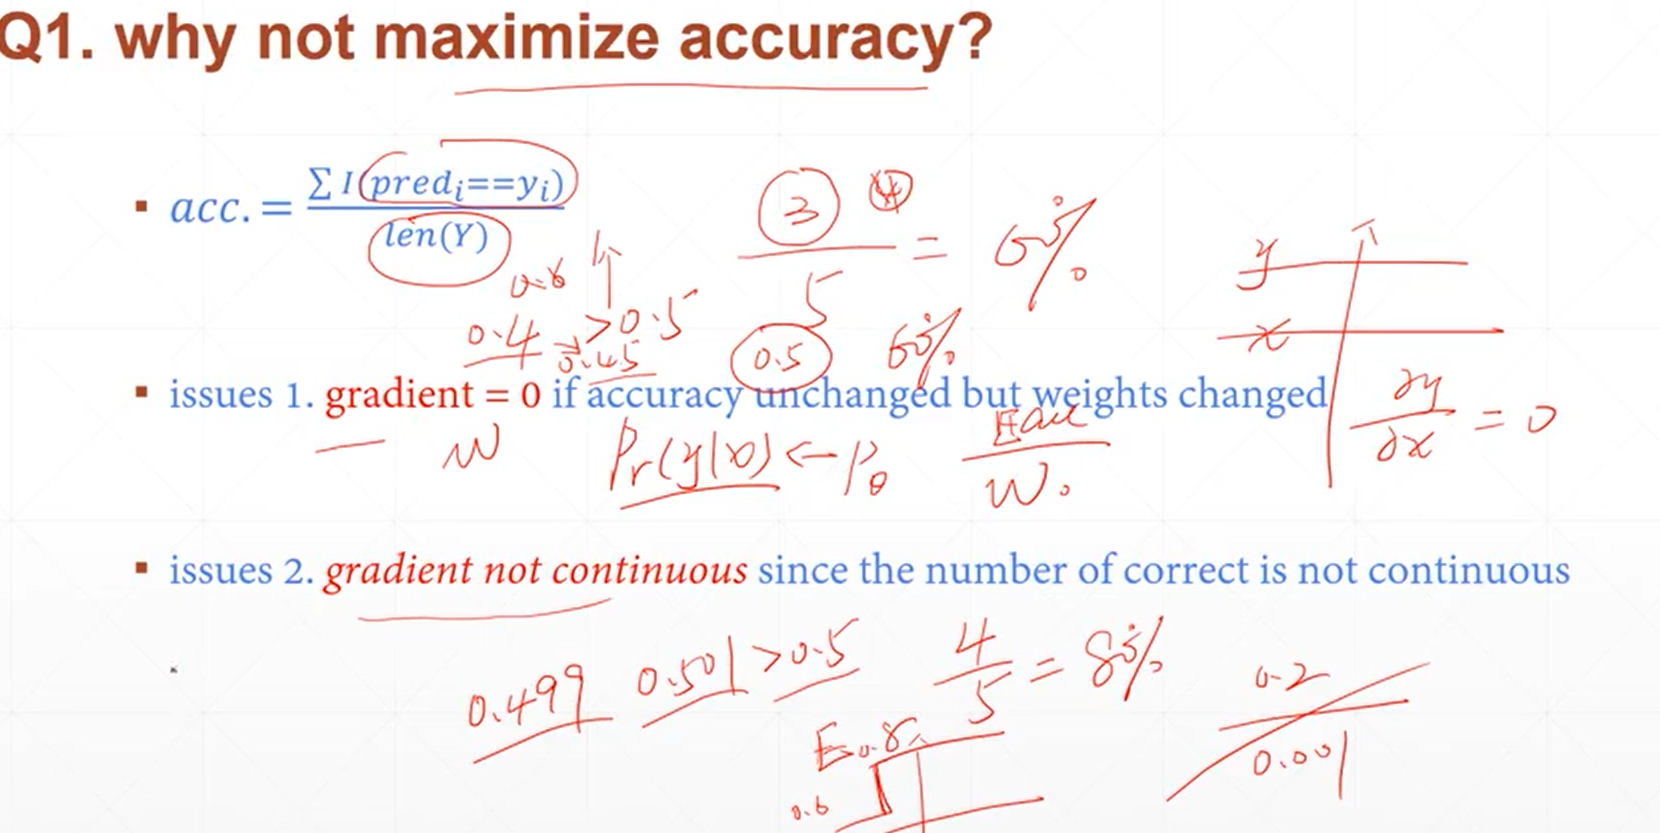

### two problem
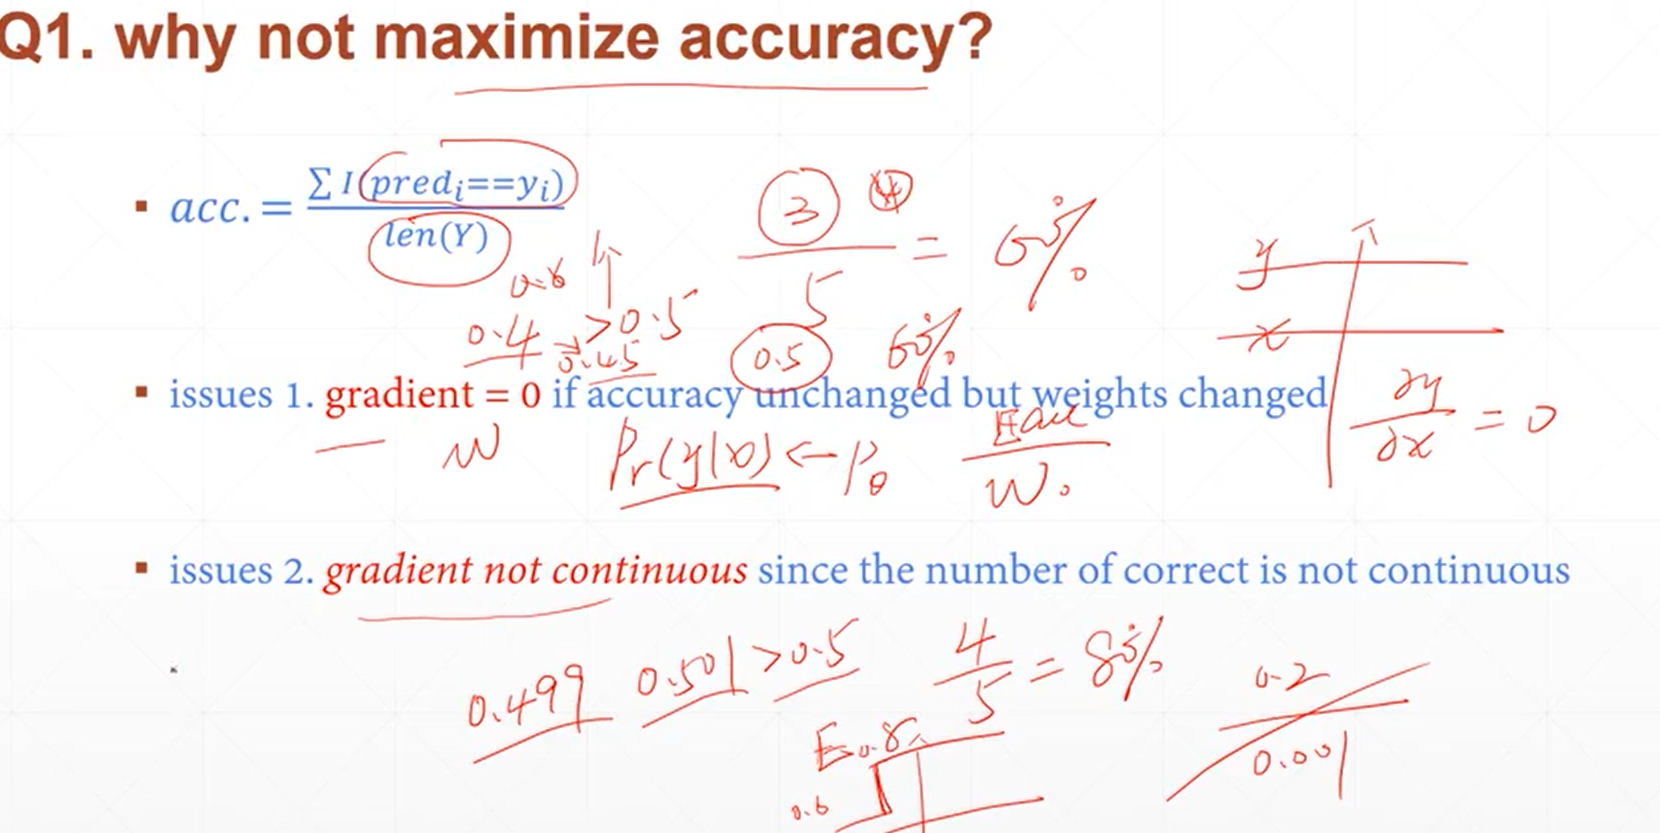

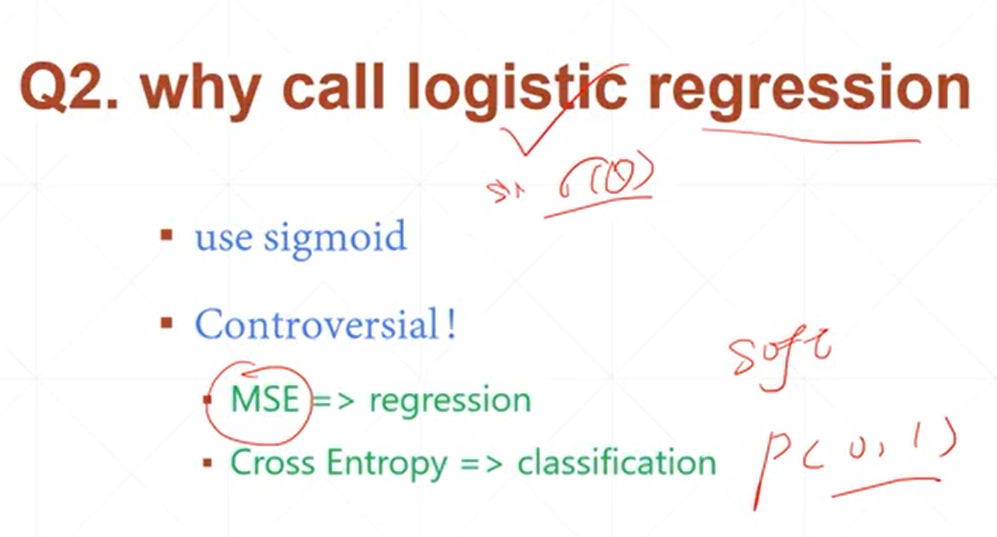

### 二分类
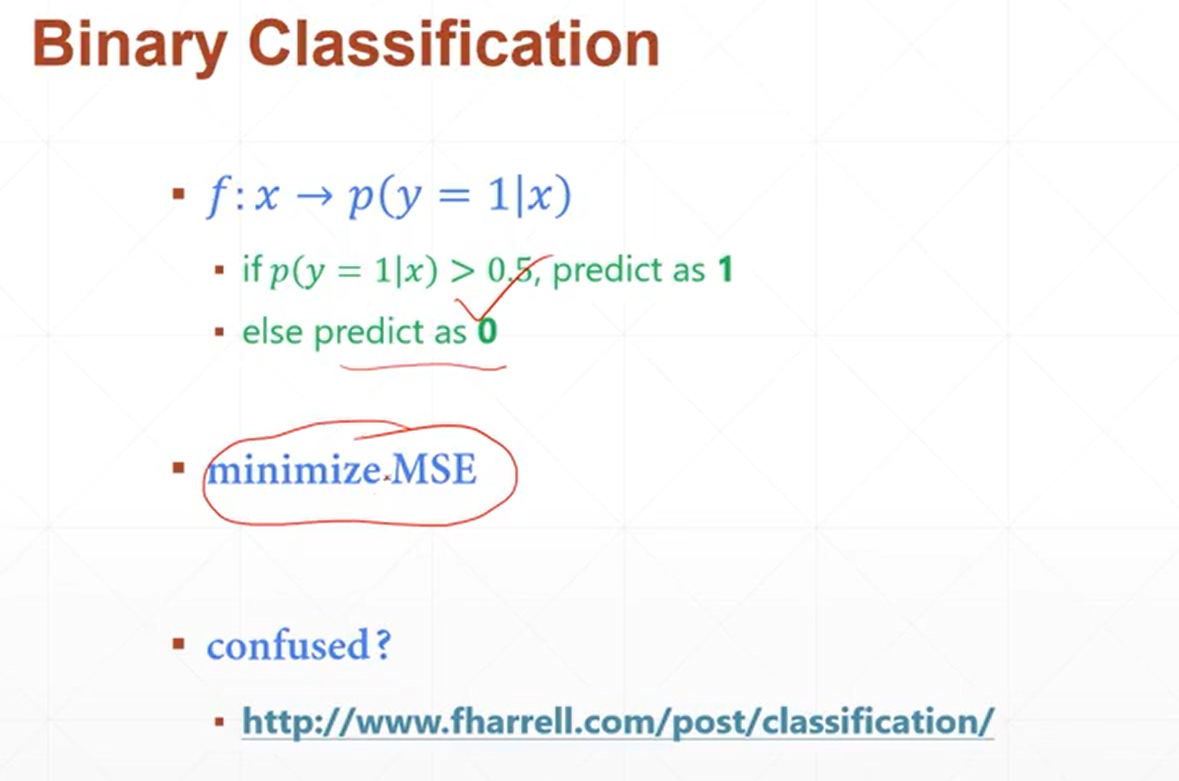

### 多分类
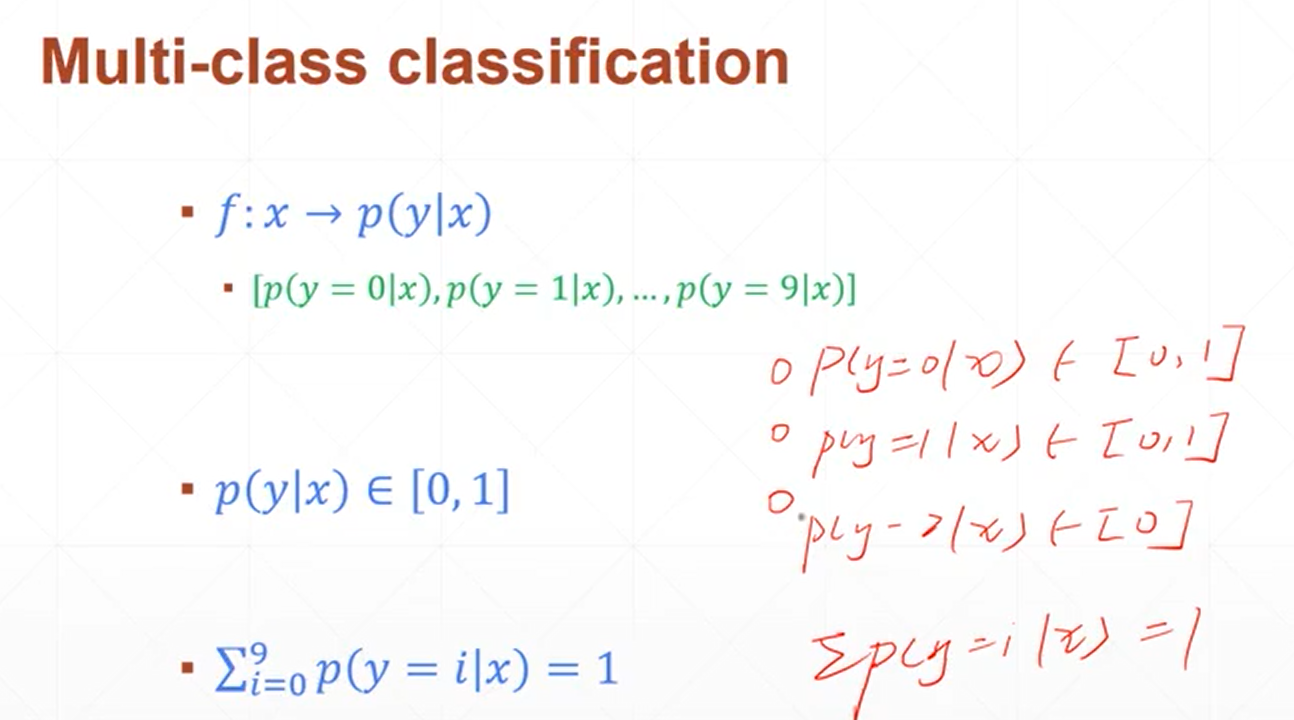

softmax

$\sum^9_{i=0} p (y=i|x) = 1$

- 放大大的倍数

#### 实战

In [ ]:
import torchvision
batch_size = 200
learning_rate=1e-3
epochs = 10

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./mnist data',train=True,download=True,
        transform = torchvision.transforms.Compose(
            [torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize((0.1307,),(0.3081,))]
        )
                ),
        batch_size = batch_size,
        shuffle=True       
)

test_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('./mnist data/',train=False ,download=True,transform = torchvision.transforms.Compose(
            [torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize((0.1307,),(0.3081,))]
        )),
        batch_size = batch_size,shuffle=True       
)

In [ ]:
w1,b1 = torch.randn(200,784,requires_grad=True),\
        torch.zeros(200,requires_grad=True)
w2,b2 = torch.randn(200,200,requires_grad=True),\
        torch.zeros(200,requires_grad=True)
w3,b3 = torch.randn(10,200,requires_grad=True),\
        torch.zeros(10,requires_grad=True)

#使用何凯明的初始化方法解决梯度离散问题
#原本没加这个之前，loss一直不更新，就是一种梯度趋近于0的梯度弥散问题
torch.nn.init.kaiming_normal_(w1)
torch.nn.init.kaiming_normal_(w2)
torch.nn.init.kaiming_normal_(w3)

def forward(x):

    x = x@w1.t()+ b1
    
    x = F.relu(x)
    x = x@w2.t()+ b2
    x = F.relu(x)
    x = x@w3.t()+ b3
    x = F.relu(x) ##这个也可以不写，logit就到这里，后面还要进行softmax
    return x 



In [ ]:


optimizer = torch.optim.SGD([w1,b1,w2,b2,w3,b3],lr = learning_rate)
criteon = torch.nn.CrossEntropyLoss()##这里千万不要先softmax再求crossentropyloss,它已经包含一次softmax

for epoch in range(epochs):
    for batch_idx,(data,target) in enumerate(train_loader):
        data = data.view(-1,28*28)
        
        logits = forward(data)
        loss = criteon(logits,target)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{}({:.0f}%)]\t Loss:{:.6f}'.format(
                epoch,batch_idx*len(data),len(train_loader.dataset),100.*batch_idx/len(train_loader),loss.item()
            ))
        
    test_loss = 0
    correct = 0
        
    for data,target in test_loader:
            data = data.view(-1,28*28)
            logits = forward(data)
            test_loss+=criteon(logits,target).item()
            
            pred = logits.data.max(1)[1]
            correct+= pred.eq(target.data).sum()
            
    test_loss /=len(test_loader.dataset)
        
    print('\nTest set:Average loss:{:.4f},Accuracy:{}/{} ({:.0f}%)\n'.format(
            test_loss,correct,len(test_loader.dataset),100.* correct/len(test_loader.dataset)))
        

## 全连接层

In [1]:
class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 10),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        x = self.model(x)

        return x


NameError: name 'nn' is not defined

In [ ]:
import  torch
import  torch.nn as nn
import  torch.nn.functional as F
import  torch.optim as optim
from    torchvision import datasets, transforms


batch_size=200
learning_rate=0.01
epochs=10

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size=batch_size, shuffle=True)

#一般采用以下的写法，nn.Linear自带了自己的初始化方式，一般够用，不够的话就要自己写
#注意 nn.ReLU与 F.relu的区别

class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 10),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        x = self.model(x)

        return x

net = MLP()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)
criteon = nn.CrossEntropyLoss()

for epoch in range(epochs):

    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.view(-1, 28*28)

        logits = net(data) #注意这里是logits
        loss = criteon(logits, target)

        optimizer.zero_grad()
        loss.backward()
        # print(w1.grad.norm(), w2.grad.norm())
        optimizer.step()

        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))


    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data = data.view(-1, 28 * 28)
        logits = net(data)
        test_loss += criteon(logits, target).item()

        pred = logits.data.max(1)[1]
        correct += pred.eq(target.data).sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


## 激活函数与GPU

激活函数见4.随机梯度下降

ReLu 在 x<0时，会出现梯度趋近于0的情况，

因此，引入Leaky ReLu:

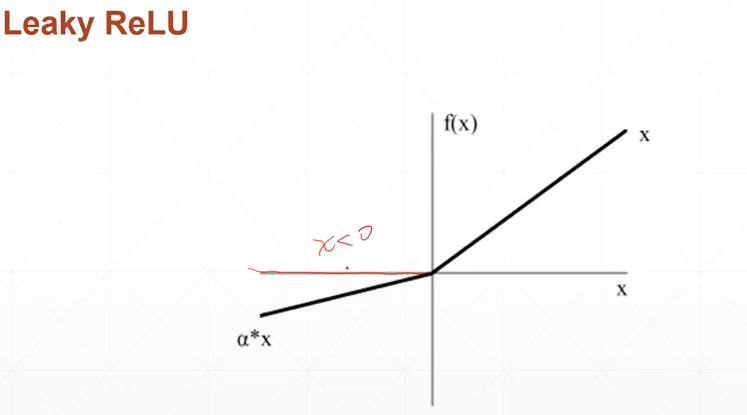


用的少的ReLu变种：

SeLu:
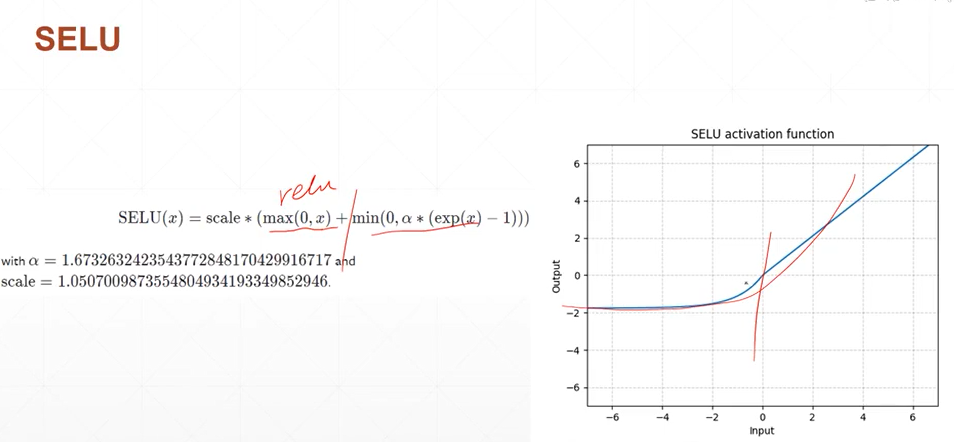

Softplus
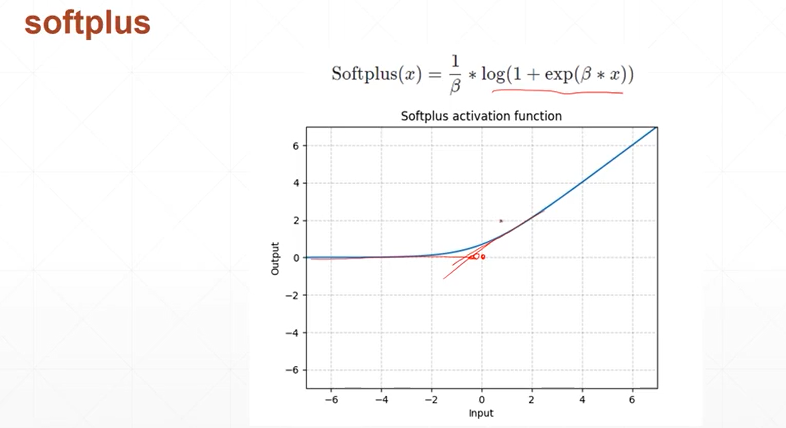

## MINST测试实战